# Linear Regression (back to the classics)

In [26]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn.apionly as sns

%matplotlib inline

In [7]:
%%time

train_df = pd.read_csv('data/split/JC_week1_hour8_40x140.csv')
test_df = pd.read_csv('data/split_test/JC_week1_hour8_test_40x140.csv')

CPU times: user 81.6 ms, sys: 12.3 ms, total: 93.9 ms
Wall time: 94 ms


In [8]:
test_df['d'] = (test_df.sx - test_df.tx)**2 + (test_df.sy - test_df.ty)**2
train_df['d'] = (train_df.sx - train_df.tx)**2 + (train_df.sy - train_df.ty)**2

In [10]:
fit = smf.ols('duration ~ d', data=train_df).fit()

In [11]:
print(fit.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.356       
Dependent Variable: duration         AIC:                1110804.4800
Date:               2017-12-09 14:38 BIC:                1110823.0131
No. Observations:   78162            Log-Likelihood:     -5.5540e+05 
Df Model:           1                F-statistic:        4.322e+04   
Df Residuals:       78160            Prob (F-statistic): 0.00        
R-squared:          0.356            Scale:              87000.      
----------------------------------------------------------------------
               Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
----------------------------------------------------------------------
Intercept     505.6847    1.2381  408.4217  0.0000  503.2579  508.1114
d               0.2581    0.0012  207.9049  0.0000    0.2556    0.2605
---------------------------------------------------------------------
Omnibus:             32277.815    

In [13]:
test_df['predict_duration'] = fit.predict(test_df)

In [18]:
test_df['err'] = (test_df['duration'] - test_df['predict_duration']) / 60

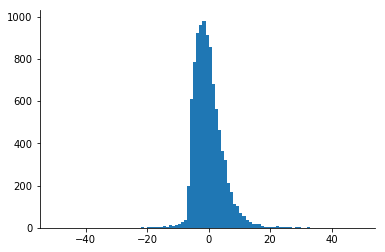

In [27]:
plt.hist(test_df.err, bins=np.arange(-50,50,1));
sns.despine()

In [24]:
stat = {
    'sd_duration' : df['duration'].std()/60,
    'mean_err': test_df.err.mean(),
    'sd_err': test_df.err.std(),
    'mean_abs_err': test_df.err.abs().mean(),
    'median_abs_err': test_df.err.abs().median(),
    '99pct_abs_err' : np.percentile(test_df.err.abs(), 99),
    'test_r2' : 1 - np.std(test_df.err) ** 2 / ((df['duration'].std()/60) ** 2)
}


In [25]:
stat

{'99pct_abs_err': 16.624779487950104,
 'mean_abs_err': 3.604333004355759,
 'mean_err': -0.04587074577055046,
 'median_abs_err': 2.9339563147096213,
 'sd_duration': 6.1262537288617,
 'sd_err': 5.006040007658989,
 'test_r2': 0.33234226665004385}